In [1]:
import os

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.

import pandas as pd

In [3]:
# Tabulate is an open-source python package/module which is used to print tabular data in nicely formatted tables. 
from tabulate import tabulate

In [5]:
pip install mysql-connector-python

     |████████████████████████████████| 37.6 MB 425 kB/s 


In [6]:
# Now we can run SQL commands on a remote MySQL database using the connector
import mysql.connector as sql

In [7]:
# using the same credentials that i use to connect to MySQL via Workbench

db_connection = sql.connect(host='208.109.18.154', database='ids20db', user='ids20', password='Pwq9213')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM Life_Expectancy')

table_rows = db_cursor.fetchall()

LfExpectancyDF = pd.DataFrame(table_rows)

print(tabulate(LfExpectancyDF, headers='keys', tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤══════╤═══════╤═════╤═══════╤══════════════╤══════╤═══════╤══════════════╤════════════╤══════╕
│     │ 0                        │    1 │     2 │   3 │     4 │            5 │    6 │     7 │            8 │          9 │   10 │
╞═════╪══════════════════════════╪══════╪═══════╪═════╪═══════╪══════════════╪══════╪═══════╪══════════════╪════════════╪══════╡
│   0 │ Afghanistan              │ 2010 │ 58.8  │ 279 │  0.01 │    79.6794   │ 16.7 │  9.2  │    553.329   │    2883167 │  9.2 │
├─────┼──────────────────────────┼──────┼───────┼─────┼───────┼──────────────┼──────┼───────┼──────────────┼────────────┼──────┤
│   1 │ Afghanistan              │ 2011 │ 59.2  │ 275 │  0.01 │     7.09711  │ 17.2 │  7.87 │     63.5372  │    2978599 │  9.5 │
├─────┼──────────────────────────┼──────┼───────┼─────┼───────┼──────────────┼──────┼───────┼──────────────┼────────────┼──────┤
│   2 │ Afghanistan              │ 2012 │ 59.5  │ 272 │  0.01 │    78.1842   │ 17.6 │  8.52 │    

In [9]:
# Let's name our dataframe columns

LfExpectancyDF.columns = ['Country','Year','Life_Expectancy','Adult_Mortality','Alcohol','Percentage_Expenditure','BMI','Total_Expenditure','GDP','Population','Schooling']

print(tabulate(LfExpectancyDF, headers='keys', tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤════════╤═══════════════════╤═══════════════════╤═══════════╤══════════════════════════╤═══════╤═════════════════════╤══════════════╤══════════════╤═════════════╕
│     │ Country                  │   Year │   Life_Expectancy │   Adult_Mortality │   Alcohol │   Percentage_Expenditure │   BMI │   Total_Expenditure │          GDP │   Population │   Schooling │
╞═════╪══════════════════════════╪════════╪═══════════════════╪═══════════════════╪═══════════╪══════════════════════════╪═══════╪═════════════════════╪══════════════╪══════════════╪═════════════╡
│   0 │ Afghanistan              │   2010 │             58.8  │               279 │      0.01 │                79.6794   │  16.7 │                9.2  │    553.329   │      2883167 │         9.2 │
├─────┼──────────────────────────┼────────┼───────────────────┼───────────────────┼───────────┼──────────────────────────┼───────┼─────────────────────┼──────────────┼──────────────┼─────────────┤
│   1 │ Afghani

In [10]:
LfExpectancyDF.describe()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
count,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,856.000000,8.560000e+02,856.000000
mean,2012.496495,70.537430,158.870327,4.178458,1011.071696,39.870327,6.038026,7730.711121,1.335176e+07,12.644042
std,1.707907,8.886691,111.048267,3.795497,2327.538535,20.585439,2.409102,14796.802371,5.362515e+07,2.973853
min,2010.000000,36.300000,1.000000,0.010000,0.108056,2.000000,0.760000,8.376432,4.100000e+01,4.500000
25%,2011.000000,63.800000,70.500000,0.430000,67.694359,22.175000,4.752500,686.911106,2.483085e+05,10.600000
50%,2012.500000,72.700000,141.000000,3.570000,371.111647,45.000000,5.400000,2616.285584,1.515082e+06,12.700000
75%,2014.000000,76.200000,227.250000,6.892500,862.888706,58.500000,7.530000,7130.859259,8.276836e+06,14.800000
max,2015.000000,89.000000,682.000000,17.310000,19479.911610,83.300000,16.610000,119172.741800,1.293859e+09,20.400000


In [11]:
LfExpectancyDF.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                      2.916947e+00
Life_Expectancy           7.897327e+01
Adult_Mortality           1.233172e+04
Alcohol                   1.440580e+01
Percentage_Expenditure    5.417436e+06
BMI                       4.237603e+02
Total_Expenditure         5.803770e+00
GDP                       2.189454e+08
Population                2.875657e+15
Schooling                 8.843801e+00
dtype: float64

In [13]:
from scipy.stats import pearsonr

data1 = LfExpectancyDF['Life_Expectancy']
data2 = LfExpectancyDF['Adult_Mortality']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.74874


In [16]:
LfExpectancyDF.corr()

,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
Year,1.000000,0.061103,-0.031863,-0.164927,-0.008085,0.051677,-0.081335,-0.013141,0.023245,0.060444
Life_Expectancy,0.061103,1.000000,-0.748739,0.435183,0.392184,0.522202,0.229150,0.465815,-0.033478,0.803615
Adult_Mortality,-0.031863,-0.748739,1.000000,-0.227662,-0.249663,-0.386093,-0.132522,-0.297913,0.024512,-0.552962
Alcohol,-0.164927,0.435183,-0.227662,1.000000,0.386903,0.270719,0.256727,0.419697,-0.029066,0.534065
Percentage_Expenditure,-0.008085,0.392184,-0.249663,0.386903,1.000000,0.214206,0.271508,0.904076,-0.032225,0.385215
BMI,0.051677,0.522202,-0.386093,0.270719,0.214206,1.000000,0.162463,0.271631,-0.074999,0.501895
Total_Expenditure,-0.081335,0.229150,-0.132522,0.256727,0.271508,0.162463,1.000000,0.259113,-0.069817,0.246330
GDP,-0.013141,0.465815,-0.297913,0.419697,0.904076,0.271631,0.259113,1.000000,-0.028964,0.479472
Population,0.023245,-0.033478,0.024512,-0.029066,-0.032225,-0.074999,-0.069817,-0.028964,1.000000,-0.048138
Schooling,0.060444,0.803615,-0.552962,0.534065,0.385215,0.501895,0.246330,0.479472,-0.048138,1.000000


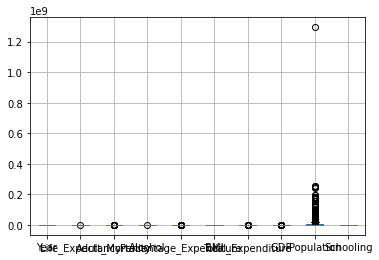

In [17]:
LfExpectancyDF.boxplot()

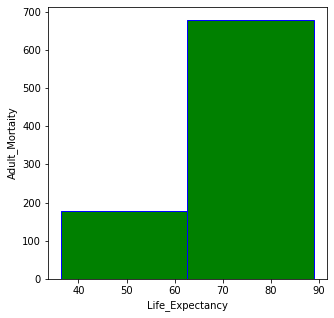

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.hist(LfExpectancyDF['Life_Expectancy'], bins=2, color="green", edgecolor="blue")

plt.xlabel('Life_Expectancy')
plt.ylabel('Adult_Mortaity')

plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
y_true=[3,-0.5,2,7]
y_pred=[2.5,0.0,2,8]
mean_squared_error(y_true, y_pred)

0.375

In [22]:
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt  


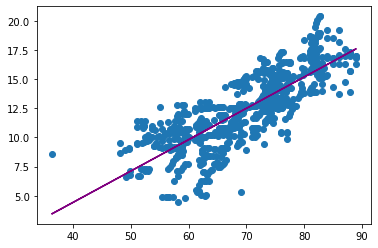

In [25]:
X = LfExpectancyDF.loc[:,'Life_Expectancy'].values.reshape(-1,1)

Y = LfExpectancyDF.loc[:,'Schooling'].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='Purple')

plt.show()

In [26]:
print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

The slope:  [[0.26892275]]
The intercept:  [-6.32507767]


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

MSE:  3.128838215956491
R2:  0.645797347147856


Project Questions


 # How does Adult mortality rates affect life expectancy?

Answer: The most common measure of life expectancy is life expectancy at birth. ... The estimate, in effect, projects the age-specific mortality (death) rates for a given period over the entire lifetime of the population born (or alive) during that time.

Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)



#Does life expectancy have positive or negative correlation with eating habits, 
#drinking alcohol, social factors, and economic factors?

Answer:alcohol consumption (combined and serving-separated) has a relatively positive correlation with life expectancy. Infant mortality and death rate are of course negatively correlated (the more/quicker people die, the more it will lower the average).

#What is the impact of schooling on the lifespan of humans? 

Answer: Even after accounting for the effects of other variables such as income, level of education was still the best predictor of YPLL. Each educational step obtained led to 1.37 fewer years of lost life expectancy, the study showed.